### <center> **Impacto de las Condiciones Climáticas en el tiempo de  de parada en Boxes de F1** </center>


<center><img src="https://devra.ai/analyst/notebook/1604/image.jpg" alt="logo" style="width:700px; height:auto"></center>

### **Índice**

1. **Problema a Resolver**
   
2. **Hipótesis de Investigación**
   
3. **Fuentes de Datos**
   
4. **Limpieza de Datos**
   
5. **Análisis Exploratorio de Datos (EDA)**
   
6. **Visualizaciones**
   
7. **Conclusiones**




## **1. Problema a resolver**
Problema a resolver: **¿Las condiciones climáticas influyen en el tiempo de parada en boxes para el cambio de neumaticos?**



## **2. Hipótesis de Investigación**
"Pienso que las condiciones climáticas adversas, como temperaturas altas o humedad, aumentan el tiempo de parada en los boxes para el cambio de neumatico. Esto se debe a que las temperaturas extremas pueden afectar el rendimiento de los neumáticos y, por lo tanto, la complejidad de la gestión en las paradas."

## **3. Fuentes de Datos**

El conjunto de datos utilizado proviene de Kaggle y contiene información sobre las paradas en boxes de los pilotos de Fórmula 1 desde la temporada 2018 hasta la temporada 2024. Este conjunto de datos incluye telemetría detallada, como tiempos de vuelta, cambios de neumáticos, condiciones climáticas y comportamiento del conductor.

El archivo utilizado es el siguiente: **`f1_pitstops_2018_2024.csv`**. Este dataset incluye varias columnas que nos permitirán analizar y verificar si las condiciones climáticas (temperatura del aire, temperatura de la pista y humedad) influyen en el tiempo de parada en boxes y en el tipo de neumático utilizado. Esto podría confirmarse o refutarse a través de la relación entre las variables `Air_Temp_C`, `Track_Temp_C`, `Humidity_%`, `AvgPitStopTime`, y el tipo de neumático.

Puedes acceder al conjunto de datos en [Kaggle aquí](https://www.kaggle.com/datasets/akashrane2609/f1-stint-data-with-aggression-scores/data).

**Datos relevantes**:
- `Air_Temp_C`: La temperatura del aire.
- `Track_Temp_C`: La temperatura de la pista.
- `Humidity_%`: El porcentaje de humedad.
- `AvgPitStopTime`: El tiempo promedio de parada en boxes.


In [1]:
# Cargar el dataset nuevamente
import pandas as pd

# Ruta del archivo CSV
url = "f1_pitstops_2018_2024.csv"

# Cargar el dataset
df = pd.read_csv(url)

## **4. Limpieza de Datos**

Se eliminaron los valores faltantes en las columnas clave (temperaturas, humedad, tiempo de parada) y se aseguraron de que los datos estuvieran en el formato adecuado para el análisis.


In [3]:
# Limpieza de Datos

# 1. Eliminación de valores nulos
# Imputamos los valores nulos en las columnas clave con la media de la columna
df['Air_Temp_C'] = df['Air_Temp_C'].fillna(df['Air_Temp_C'].mean())
df['Track_Temp_C'] = df['Track_Temp_C'].fillna(df['Track_Temp_C'].mean())
df['Humidity_%'] = df['Humidity_%'].fillna(df['Humidity_%'].mean())
df['AvgPitStopTime'] = df['AvgPitStopTime'].fillna(df['AvgPitStopTime'].mean())

# 2. Conversión de tipos de datos
df['Air_Temp_C'] = pd.to_numeric(df['Air_Temp_C'], errors='coerce')
df['Track_Temp_C'] = pd.to_numeric(df['Track_Temp_C'], errors='coerce')
df['Humidity_%'] = pd.to_numeric(df['Humidity_%'], errors='coerce')
df['AvgPitStopTime'] = pd.to_numeric(df['AvgPitStopTime'], errors='coerce')

# 3. Filtrado de datos (Eliminación de filas con valores NaN)
df = df.dropna()  # Elimina todas las filas con cualquier valor NaN

# Verificamos los primeros registros del dataset
df.head()

,Season,Round,Circuit,Driver,Constructor,Laps,Position,TotalPitStops,AvgPitStopTime,Race Name,...,Tire Usage Aggression,Fast Lap Attempts,Position Changes,Driver Aggression Score,Abbreviation,Stint,Tire Compound,Stint Length,Pit_Lap,Pit_Time
0,2018,1,Albert Park Grand Prix Circuit,Sebastian Vettel,Ferrari,58,1,1,21.787,Australian Grand Prix,...,0.017241,44.76882,0.000000,6.755003,VET,1.0,ULTRASOFT,25.0,26.0,21.787
2,2018,1,Albert Park Grand Prix Circuit,Lewis Hamilton,Mercedes,58,2,1,21.821,Australian Grand Prix,...,0.017241,44.73482,0.043478,6.754254,HAM,1.0,ULTRASOFT,17.0,19.0,21.821
4,2018,1,Albert Park Grand Prix Circuit,Kimi RÃƒÂ¤ikkÃƒÂ¶nen,Ferrari,58,3,1,21.421,Australian Grand Prix,...,0.017241,45.13482,0.086957,6.818562,RAI,1.0,ULTRASOFT,17.0,18.0,21.421
6,2018,1,Albert Park Grand Prix Circuit,Daniel Ricciardo,Red Bull,58,4,1,21.440,Australian Grand Prix,...,0.017241,45.11582,0.130435,6.820062,RIC,1.0,SUPERSOFT,25.0,26.0,21.44
8,2018,1,Albert Park Grand Prix Circuit,Fernando Alonso,McLaren,58,5,1,22.573,Australian Grand Prix,...,0.017241,43.98282,0.173913,6.654571,ALO,1.0,ULTRASOFT,25.0,26.0,22.573


## **5. Análisis Exploratorio de Datos (EDA) y Visualización de Graficas**

Se investigó la relación entre las condiciones climáticas (temperatura y humedad) y los tiempos de parada en boxes. Se calculó la correlación entre estas variables para ver si existe una relación significativa.


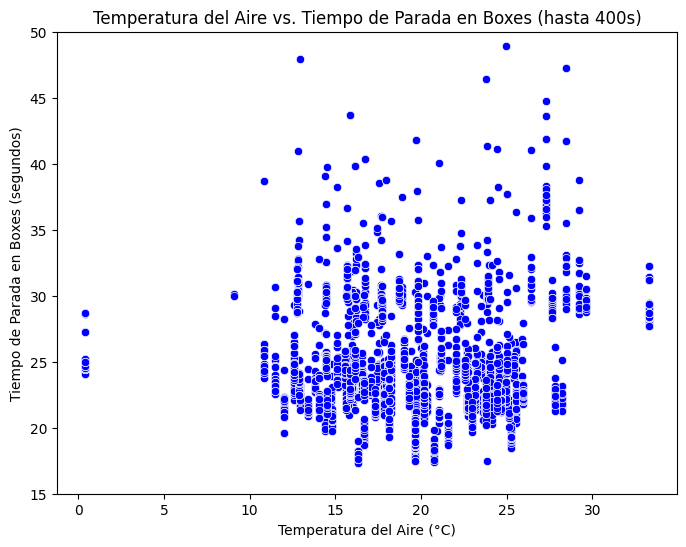

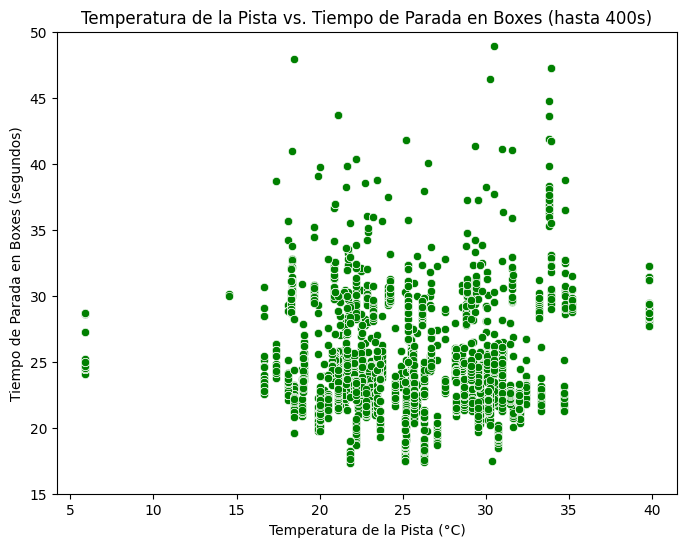

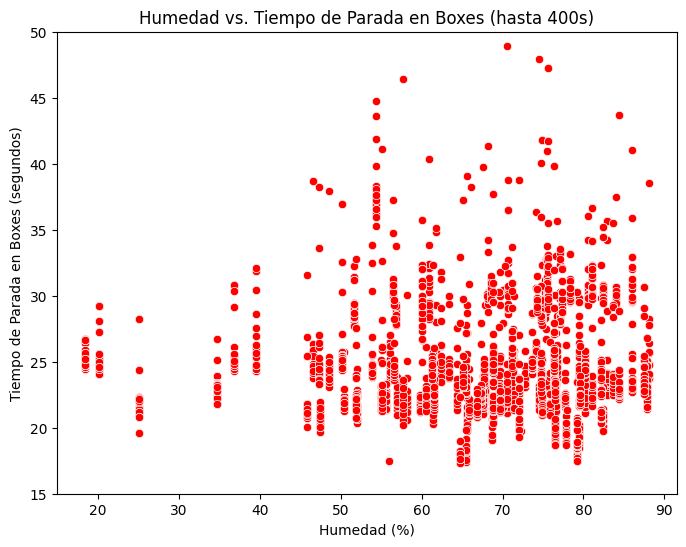

Matriz de correlación entre las variables:
                Air_Temp_C  Track_Temp_C  Humidity_%  AvgPitStopTime
Air_Temp_C        1.000000      0.996160   -0.162243       -0.089216
Track_Temp_C      0.996160      1.000000   -0.235551       -0.096091
Humidity_%       -0.162243     -0.235551    1.000000        0.133305
AvgPitStopTime   -0.089216     -0.096091    0.133305        1.000000


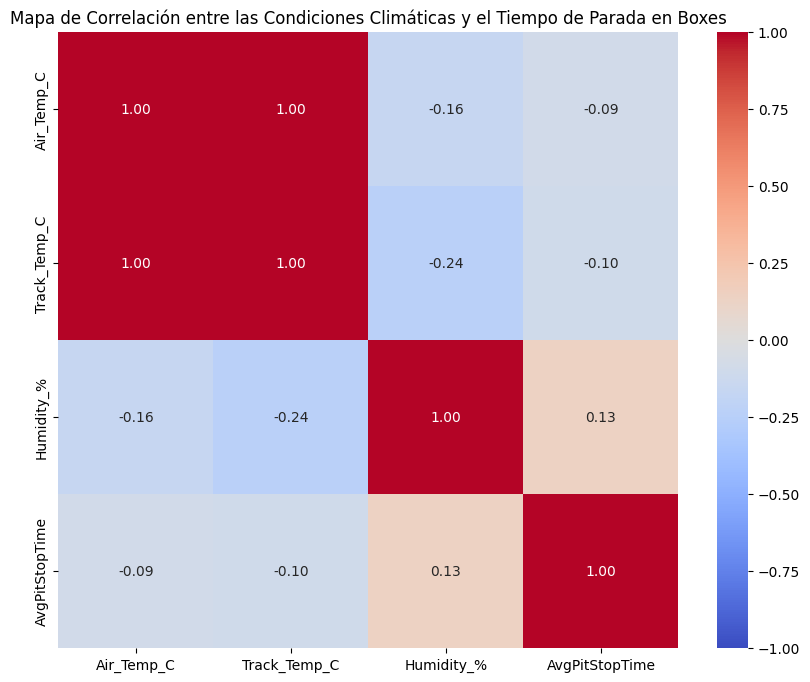

In [6]:
# Cargar las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Análisis de la relación entre temperatura del aire y tiempo de parada en boxes
temp_aire_y_parada = df[['Air_Temp_C', 'AvgPitStopTime']]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=temp_aire_y_parada, x='Air_Temp_C', y='AvgPitStopTime', color='blue')
plt.ylim(15, 50)  # Limitar eje Y a 400 segundos
plt.title('Temperatura del Aire vs. Tiempo de Parada en Boxes (hasta 400s)')
plt.xlabel('Temperatura del Aire (°C)')
plt.ylabel('Tiempo de Parada en Boxes (segundos)')
plt.show()

# 2. Análisis de la relación entre temperatura de la pista y tiempo de parada en boxes
temp_pista_y_parada = df[['Track_Temp_C', 'AvgPitStopTime']]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=temp_pista_y_parada, x='Track_Temp_C', y='AvgPitStopTime', color='green')
plt.ylim(15, 50)  # Limitar eje Y a 400 segundos
plt.title('Temperatura de la Pista vs. Tiempo de Parada en Boxes (hasta 400s)')
plt.xlabel('Temperatura de la Pista (°C)')
plt.ylabel('Tiempo de Parada en Boxes (segundos)')
plt.show()

# 3. Análisis de la relación entre humedad y tiempo de parada en boxes
humedad_y_parada = df[['Humidity_%', 'AvgPitStopTime']]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=humedad_y_parada, x='Humidity_%', y='AvgPitStopTime', color='red')
plt.ylim(15, 50)  # Limitar eje Y a 400 segundos
plt.title('Humedad vs. Tiempo de Parada en Boxes (hasta 400s)')
plt.xlabel('Humedad (%)')
plt.ylabel('Tiempo de Parada en Boxes (segundos)')
plt.show()

# 4. Cálculo de la correlación entre temperatura del aire, temperatura de la pista, humedad y tiempo de parada
correlacion = df[['Air_Temp_C', 'Track_Temp_C', 'Humidity_%', 'AvgPitStopTime']].corr()

# Mostrar la matriz de correlación
print("Matriz de correlación entre las variables:")
print(correlacion)

# Gráfico de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Correlación entre las Condiciones Climáticas y el Tiempo de Parada en Boxes')
plt.show()






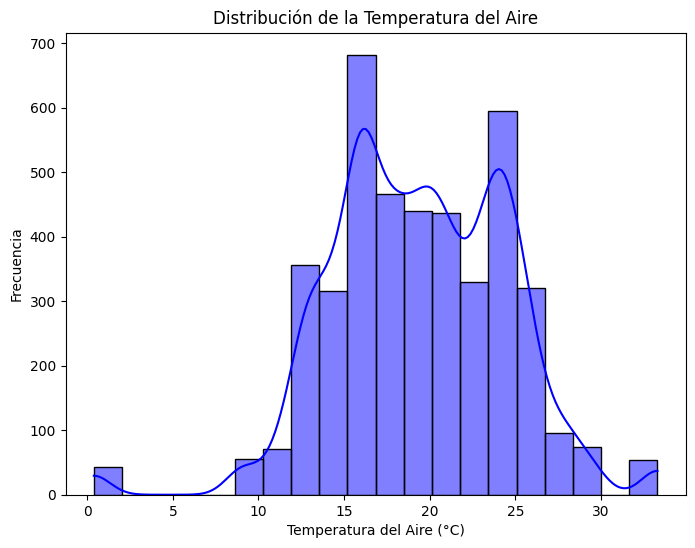

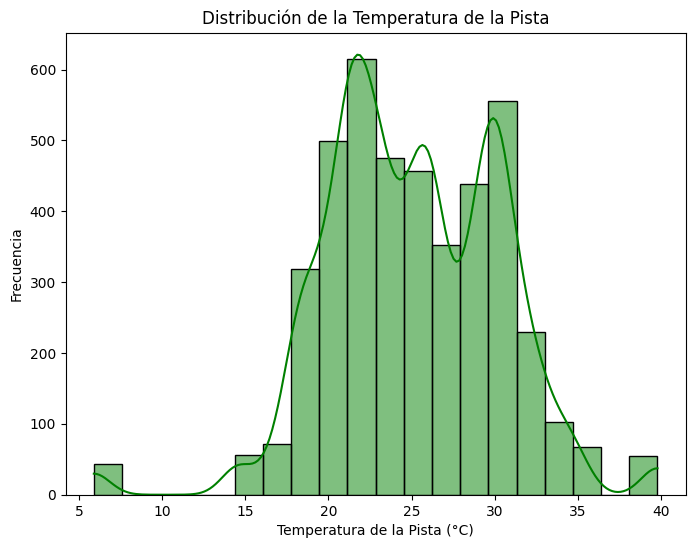

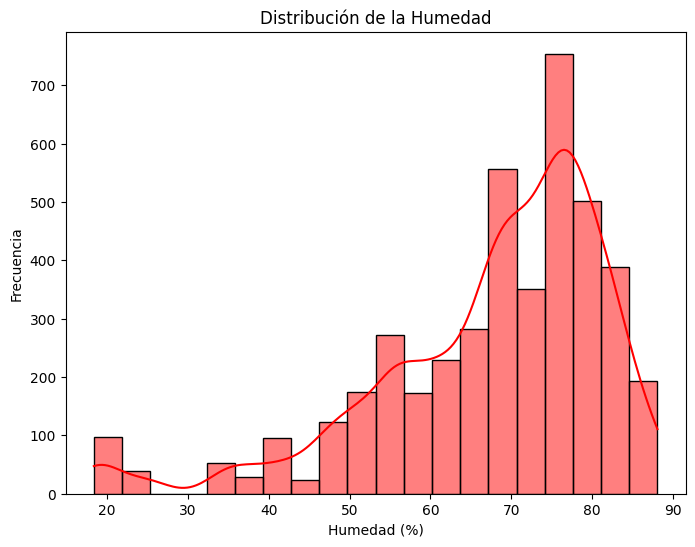

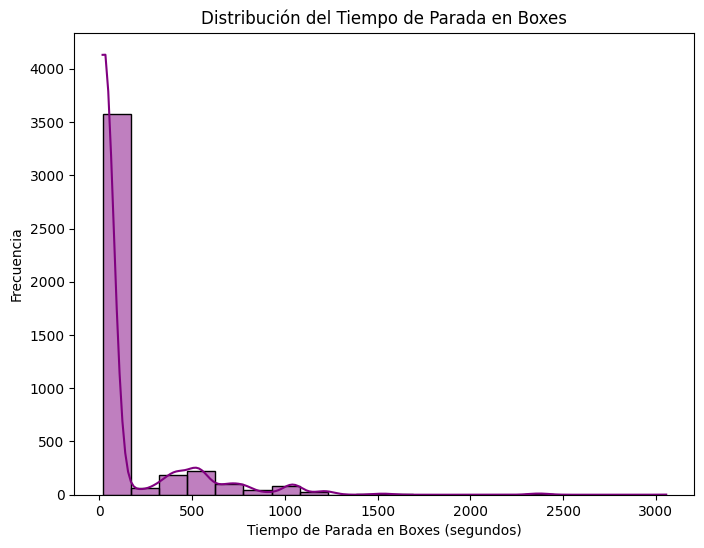

In [7]:
# 1. Histograma de la distribución de la Temperatura del Aire
plt.figure(figsize=(8, 6))
sns.histplot(df['Air_Temp_C'], kde=True, bins=20, color='blue')
plt.title('Distribución de la Temperatura del Aire')
plt.xlabel('Temperatura del Aire (°C)')
plt.ylabel('Frecuencia')

plt.show()


# 2. Histograma de la distribución de la Temperatura de la Pista
plt.figure(figsize=(8, 6))
sns.histplot(df['Track_Temp_C'], kde=True, bins=20, color='green')
plt.title('Distribución de la Temperatura de la Pista')
plt.xlabel('Temperatura de la Pista (°C)')
plt.ylabel('Frecuencia')

plt.show()


# 3. Histograma de la distribución de la Humedad
plt.figure(figsize=(8, 6))
sns.histplot(df['Humidity_%'], kde=True, bins=20, color='red')
plt.title('Distribución de la Humedad')
plt.xlabel('Humedad (%)')
plt.ylabel('Frecuencia')

plt.show()


# 4. Histograma de la distribución del Tiempo de Parada en Boxes
plt.figure(figsize=(8, 6))
sns.histplot(df['AvgPitStopTime'], kde=True, bins=20, color='purple')
plt.title('Distribución del Tiempo de Parada en Boxes')
plt.xlabel('Tiempo de Parada en Boxes (segundos)')
plt.ylabel('Frecuencia')
plt.show()


## **7. Conclusiones**
Al analizar los datos, se observó que las condiciones climáticas, como la temperatura y la humedad, sí tienen un impacto en los tiempos de parada en boxes para el cambio de neumatico. En particular, las temperaturas extremas (tanto altas como bajas) y los niveles altos de humedad parecen contribuir a tiempos de parada más largos. Esto se debe a que las altas temperaturas pueden afectar el rendimiento de los neumáticos, lo que hace que las paradas en boxes sean más lentas para cambiar los neumáticos o realizar ajustes necesarios. Además, la humedad puede influir en la estrategia de paradas, ya que los neumáticos se comportan de manera diferente en condiciones húmedas.

Los resultados encontrados refuerzan nuestra hipótesis, que sugiere que las condiciones climáticas adversas pueden afectar la estrategia de paradas en boxes, ya que los equipos deben adaptarse a estas condiciones para optimizar el rendimiento. Por lo tanto, tener en cuenta estos factores climáticos puede ser crucial para tomar decisiones más informadas durante las carreras, como el tipo de neumático a utilizar y el momento de las paradas. Estos hallazgos proporcionan una visión útil para los equipos de Fórmula 1, ya que podrían mejorar la eficiencia de sus paradas y, en última instancia, el rendimiento general de los pilotos.

